In [2]:
import pandas as pd

In [6]:
# Define the path to the Excel file
excel_file_path = 'Study2_answers.xlsx'

# Read the Excel file
excel_data = pd.ExcelFile(excel_file_path)

# List to hold the data from each sheet
data_frames = []

# Standard column names for alignment
standard_columns = [
    'Set_arguments', 'fallacy_type',
    'hint_used_short', 'short_response',
    'hint_used_open', 'open_response',
]

# Loop through each sheet name and append to data_frames list
for sheet_name in excel_data.sheet_names:
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    
    # Standardize the column names
    column_mapping = {
        df.columns[0]: 'Set_arguments',
        df.columns[1]: 'fallacy_type',
        df.columns[2]: 'hint_used_short',
        df.columns[3]: 'short_response',
        df.columns[4]: 'hint_used_open',
        df.columns[5]: 'open_response',
    }
    df.rename(columns=column_mapping, inplace=True)
    
    # Extract the set number from the sheet name
    try:
        set_number = int(sheet_name.split('_')[1])
    except (IndexError, ValueError):
        print(f"Warning: Could not extract set number from sheet name '{sheet_name}'")
        set_number = None
    
    # Debug print
    print(f"Sheet name: {sheet_name}, Set number: {set_number}")
    
    # Add a column to indicate the set number
    df['Set_number'] = set_number
    
    # Reorder columns to move 'Set_number' to the first position
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    
    data_frames.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(data_frames, ignore_index=True)

# Save the combined dataframe to a new CSV file for easy access later
combined_df.to_csv('Combined_Study2_answers.csv', index=False)

# Display the combined dataframe
print(combined_df.head())


Sheet name: Set_1, Set number: 1
Sheet name: Set_2, Set number: 2
Sheet name: Set_3, Set number: 3
Sheet name: Set_4, Set number: 4
Sheet name: Set_5, Set number: 5
Sheet name: Set_6, Set number: 6
Sheet name: Set_7, Set number: 7
Sheet name: Set_8, Set number: 8
Sheet name: Set_9, Set number: 9
Sheet name: Set_10, Set number: 10
Sheet name: Set_11, Set number: 11
Sheet name: Set_12, Set number: 12
Sheet name: Set_13, Set number: 13
Sheet name: Set_14, Set number: 14
Sheet name: Set_15, Set number: 15
Sheet name: Set_16, Set number: 16
Sheet name: Set_17, Set number: 17
Sheet name: Set_18, Set number: 18
Sheet name: Set_19, Set number: 19
Sheet name: Set_20, Set number: 20
   Set_number Set_arguments      fallacy_type  hint_used_short  \
0           1         S1_A1  fallacy of logic                0   
1           1         S1_A2      equivocation                0   
2           1         S1_A3        ad hominem                0   
3           1         S1_A4        no fallacy         

In [7]:
# Calculate the accuracy rate per set
accuracy_rate_per_set = combined_df.groupby('Set_number')['short_response'].mean().reset_index()

# Rename columns for clarity
accuracy_rate_per_set.columns = ['Set_number', 'Accuracy_Rate']

# Sort the dataframe by 'Accuracy_Rate'
accuracy_rate_per_set = accuracy_rate_per_set.sort_values(by='Accuracy_Rate')

# Calculate the overall average accuracy rate
average_accuracy_per_set = accuracy_rate_per_set['Accuracy_Rate'].mean()

# Display the accuracy rate per set and the overall average accuracy rate
print("Accuracy Rate per Set:")
print(accuracy_rate_per_set)
print("\nOverall Average Accuracy Rate:", average_accuracy_per_set)

# Optionally, save the accuracy rate per set to a CSV file
#accuracy_rate_per_set.to_csv('Accuracy_Rate_per_Set.csv', index=False)


Accuracy Rate per Set:
    Set_number  Accuracy_Rate
10          11            0.5
18          19            0.6
9           10            0.7
7            8            0.7
8            9            0.7
15          16            0.8
2            3            0.8
14          15            0.9
13          14            0.9
12          13            0.9
11          12            0.9
19          20            0.9
4            5            0.9
3            4            0.9
1            2            0.9
6            7            0.9
5            6            1.0
16          17            1.0
17          18            1.0
0            1            1.0

Overall Average Accuracy Rate: 0.845


In [8]:
# Calculate the accuracy rate per fallacy type
accuracy_rate_per_fallacy = combined_df.groupby('fallacy_type')['short_response'].mean().reset_index()

# Rename columns for clarity
accuracy_rate_per_fallacy.columns = ['Fallacy_Type', 'Accuracy_Rate']

# Sort the dataframe by 'Accuracy_Rate'
accuracy_rate_per_fallacy = accuracy_rate_per_fallacy.sort_values(by='Accuracy_Rate')

# Calculate the overall average accuracy rate across all fallacy types
average_accuracy_per_fallacy = accuracy_rate_per_fallacy['Accuracy_Rate'].mean()

# Display the accuracy rate per fallacy type and the overall average accuracy rate
print("Accuracy Rate per Fallacy Type:")
print(accuracy_rate_per_fallacy)
print("\nOverall Average Accuracy Rate:", average_accuracy_per_fallacy)

# Optionally, save the accuracy rate per fallacy type to a CSV file
#accuracy_rate_per_fallacy.to_csv('Accuracy_Rate_per_Fallacy_Type.csv', index=False)


Accuracy Rate per Fallacy Type:
              Fallacy_Type  Accuracy_Rate
13              no fallacy       0.633333
5   fallacy of credibility       0.833333
0               ad hominem       0.866667
4             equivocation       0.875000
1               ad populum       0.900000
8     fallacy of relevance       0.909091
10           false dilemma       0.909091
9          false causality       0.937500
2        appeal to emotion       1.000000
3       circular reasoning       1.000000
6     fallacy of extension       1.000000
7         fallacy of logic       1.000000
11   faulty generalization       1.000000
12             intentional       1.000000

Overall Average Accuracy Rate: 0.918858225108225


In [9]:
# Calculate the general accuracy rate
general_accuracy_rate = combined_df['short_response'].mean()

# Display the general accuracy rate
print("General Accuracy Rate:", general_accuracy_rate)

General Accuracy Rate: 0.845


In [10]:
import pandas as pd

# Assuming combined_df is your combined DataFrame

# Calculate the length of each open response
combined_df['response_length'] = combined_df['open_response'].str.len()

# Calculate the average response length per fallacy type
average_length_per_fallacy = combined_df.groupby('fallacy_type')['response_length'].mean().reset_index()
average_length_per_fallacy.columns = ['fallacy_type', 'Average_Length']
average_length_per_fallacy = average_length_per_fallacy.sort_values(by='Average_Length')

# Calculate the accuracy rate per fallacy type
accuracy_rate_per_fallacy = combined_df.groupby('fallacy_type')['short_response'].mean().reset_index()
accuracy_rate_per_fallacy.columns = ['fallacy_type', 'Accuracy_Rate']
accuracy_rate_per_fallacy = accuracy_rate_per_fallacy.sort_values(by='Accuracy_Rate')

# Merge the accuracy and length data
fallacy_analysis = pd.merge(accuracy_rate_per_fallacy, average_length_per_fallacy, on='fallacy_type')

# Display the ranked results
print("\nRanked Accuracy Rate per Fallacy Type:")
print(accuracy_rate_per_fallacy)
print("\nRanked Average Response Length per Fallacy Type:")
print(average_length_per_fallacy)

# Calculate correlation between accuracy rate and average response length
correlation = fallacy_analysis['Accuracy_Rate'].corr(fallacy_analysis['Average_Length'])
print(f"\nCorrelation between Accuracy Rate and Average Response Length: {correlation}")

# Optionally, save the fallacy analysis data to a CSV file
fallacy_analysis.to_csv('Fallacy_Analysis.csv', index=False)



Ranked Accuracy Rate per Fallacy Type:
              fallacy_type  Accuracy_Rate
13              no fallacy       0.633333
5   fallacy of credibility       0.833333
0               ad hominem       0.866667
4             equivocation       0.875000
1               ad populum       0.900000
8     fallacy of relevance       0.909091
10           false dilemma       0.909091
9          false causality       0.937500
2        appeal to emotion       1.000000
3       circular reasoning       1.000000
6     fallacy of extension       1.000000
7         fallacy of logic       1.000000
11   faulty generalization       1.000000
12             intentional       1.000000

Ranked Average Response Length per Fallacy Type:
              fallacy_type  Average_Length
12             intentional       76.333333
0               ad hominem       89.600000
8     fallacy of relevance      100.363636
7         fallacy of logic      103.666667
6     fallacy of extension      110.200000
5   fallacy of credibi

In [15]:
# Group by 'fallacy_type' and calculate the sum of hints used for open responses
hints_used_open_per_fallacy = combined_df.groupby('fallacy_type')['hint_used_open'].sum().reset_index()
hints_used_open_per_fallacy.columns = ['Fallacy_Type', 'Hints_Used_Open']

# Group by 'fallacy_type' and calculate the sum of hints used for short responses
hints_used_short_per_fallacy = combined_df.groupby('fallacy_type')['hint_used_short'].sum().reset_index()
hints_used_short_per_fallacy.columns = ['Fallacy_Type', 'Hints_Used_Short']

# Sort the results to rank by the number of hints used
hints_used_open_per_fallacy = hints_used_open_per_fallacy.sort_values(by='Hints_Used_Open', ascending=False)
hints_used_short_per_fallacy = hints_used_short_per_fallacy.sort_values(by='Hints_Used_Short', ascending=False)

# Display the results
print("Ranked Hints Used for Open Responses per Fallacy Type:")
print(hints_used_open_per_fallacy)
print("\nRanked Hints Used for Short Responses per Fallacy Type:")
print(hints_used_short_per_fallacy)

# Optionally, save the results to separate CSV files
#hints_used_open_per_fallacy.to_csv('Ranked_Hints_Used_for_Open_Responses_per_Fallacy_Type.csv', index=False)
#hints_used_short_per_fallacy.to_csv('Ranked_Hints_Used_for_Short_Responses_per_Fallacy_Type.csv', index=False)

# Calculate the total hints used for both open and short responses
hints_used_per_fallacy = combined_df.groupby('fallacy_type')[['hint_used_open', 'hint_used_short']].sum().reset_index()
hints_used_per_fallacy.columns = ['Fallacy_Type', 'Hints_Used_Open', 'Hints_Used_Short']

# Add a column for the total hints used
hints_used_per_fallacy['Total_Hints_Used'] = hints_used_per_fallacy['Hints_Used_Open'] + hints_used_per_fallacy['Hints_Used_Short']

# Sort the combined results to rank by the total number of hints used
hints_used_per_fallacy = hints_used_per_fallacy.sort_values(by='Total_Hints_Used', ascending=False)

# Display the combined results
print("\nRanked Total Hints Used per Fallacy Type:")
print(hints_used_per_fallacy)

# Optionally, save the combined results to a CSV file
#hints_used_per_fallacy.to_csv('Ranked_Total_Hints_Used_per_Fallacy_Type.csv', index=False)


Ranked Hints Used for Open Responses per Fallacy Type:
              Fallacy_Type  Hints_Used_Open
13              no fallacy                7
2        appeal to emotion                2
6     fallacy of extension                2
9          false causality                2
0               ad hominem                1
3       circular reasoning                1
5   fallacy of credibility                1
7         fallacy of logic                1
8     fallacy of relevance                1
10           false dilemma                1
11   faulty generalization                1
12             intentional                1
1               ad populum                0
4             equivocation                0

Ranked Hints Used for Short Responses per Fallacy Type:
              Fallacy_Type  Hints_Used_Short
13              no fallacy                 9
3       circular reasoning                 2
6     fallacy of extension                 2
8     fallacy of relevance                 2
10 

In [17]:
# Calculate the total number of arguments
total_arguments = combined_df.shape[0]

# Calculate the number of arguments that required a hint for open responses
hints_used_open_count = combined_df['hint_used_open'].sum()

# Calculate the number of arguments that required a hint for short responses
hints_used_short_count = combined_df['hint_used_short'].sum()

# Calculate the total number of arguments that required any hint
total_hints_used_count = combined_df[['hint_used_open', 'hint_used_short']].any(axis=1).sum()

# Calculate the percentage of hint use
percentage_hint_use = (total_hints_used_count / total_arguments) * 100

# Display the results
print(f"Total Arguments: {total_arguments}")
print(f"Arguments that required a hint for open responses: {hints_used_open_count}")
print(f"Arguments that required a hint for short responses: {hints_used_short_count}")
print(f"Total arguments that required any hint: {total_hints_used_count}")
print(f"Percentage of hint use: {percentage_hint_use:.2f}%")

# Optionally, save the results to a CSV file
#hint_usage_summary = pd.DataFrame({
    #"Total_Arguments": [total_arguments],
    #"Hints_Used_Open": [hints_used_open_count],
    #"Hints_Used_Short": [hints_used_short_count],
    #"Total_Hints_Used": [total_hints_used_count],
    #"Percentage_Hint_Use": [percentage_hint_use]
#})

#hint_usage_summary.to_csv('Hint_Usage_Summary.csv', index=False)


Total Arguments: 200
Arguments that required a hint for open responses: 21
Arguments that required a hint for short responses: 24
Total arguments that required any hint: 45
Percentage of hint use: 22.50%


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakutepova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


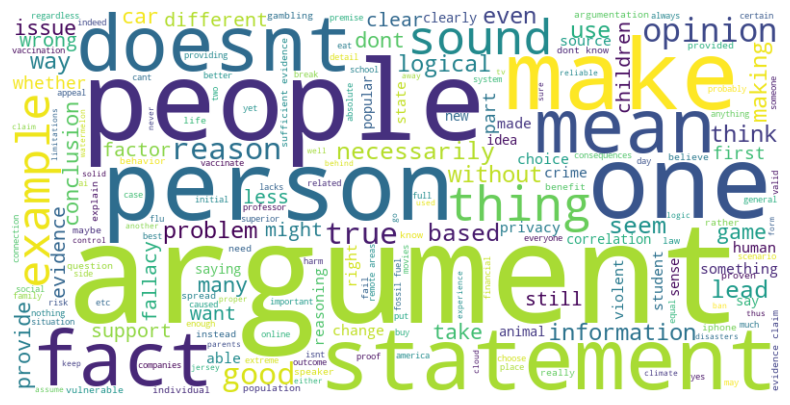

Most Common Words:
argument: 41
people: 25
one: 20
person: 19
statement: 19
doesnt: 16
mean: 14
evidence: 14
like: 13
example: 12
make: 11
dont: 11
opinion: 10
sounds: 10
true: 10
fact: 9
necessarily: 9
good: 9
based: 9
things: 9


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Download the stopwords from nltk
nltk.download('stopwords')


# Combine all open responses into a single text
all_responses = ' '.join(combined_df['open_response'].fillna(''))

# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Preprocess and remove stopwords from the combined text
all_responses = preprocess_text(all_responses)
all_responses = remove_stopwords(all_responses)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Perform word frequency analysis
word_counts = Counter(all_responses.split())
most_common_words = word_counts.most_common(20)

# Display the most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakutepova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


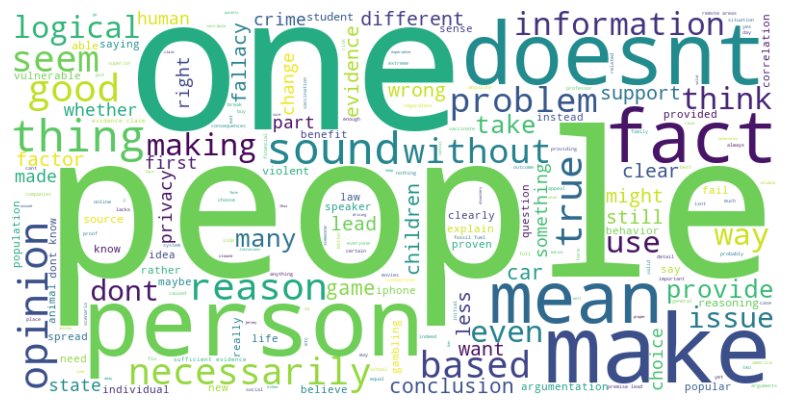

Most Common Words:
people: 25
one: 20
person: 19
doesnt: 16
mean: 14
evidence: 14
like: 13
make: 11
dont: 11
opinion: 10
sounds: 10
true: 10
fact: 9
necessarily: 9
good: 9
based: 9
things: 9
makes: 9
without: 8
information: 8


In [12]:
# Download the stopwords from nltk
nltk.download('stopwords')


# Combine all open responses into a single text
all_responses = ' '.join(combined_df['open_response'].fillna(''))

# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Remove stop words with additional custom stopwords
def remove_stopwords(text, additional_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if additional_stopwords:
        stop_words.update(additional_stopwords)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Additional stopwords
additional_stopwords = {'example', 'statement', 'argument'}

# Preprocess and remove stopwords from the combined text
all_responses = preprocess_text(all_responses)
all_responses = remove_stopwords(all_responses, additional_stopwords)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Perform word frequency analysis
word_counts = Counter(all_responses.split())
most_common_words = word_counts.most_common(20)

# Display the most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


In [18]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    if pd.isna(text):
        return 0
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the open responses
combined_df['sentiment'] = combined_df['open_response'].apply(calculate_sentiment)

# Calculate the average sentiment per fallacy type
sentiment_per_fallacy = combined_df.groupby('fallacy_type')['sentiment'].mean().reset_index()
sentiment_per_fallacy.columns = ['Fallacy_Type', 'Average_Sentiment']

# Sort the results
sentiment_per_fallacy = sentiment_per_fallacy.sort_values(by='Average_Sentiment', ascending=False)

# Display the results
print("Average Sentiment per Fallacy Type:")
print(sentiment_per_fallacy)

# Optionally, save the results to a CSV file
#sentiment_per_fallacy.to_csv('Sentiment_per_Fallacy_Type.csv', index=False)


Average Sentiment per Fallacy Type:
              Fallacy_Type  Average_Sentiment
8     fallacy of relevance           0.132576
1               ad populum           0.102592
11   faulty generalization           0.098810
5   fallacy of credibility           0.093023
4             equivocation           0.090625
13              no fallacy           0.086807
7         fallacy of logic           0.062410
6     fallacy of extension           0.043646
3       circular reasoning           0.040076
2        appeal to emotion           0.007738
9          false causality          -0.000086
12             intentional          -0.018750
10           false dilemma          -0.041755
0               ad hominem          -0.072315


Average Sentiment per Fallacy Type:
              Fallacy_Type  Average_Sentiment
0               ad hominem          -0.072315
10           false dilemma          -0.041755
12             intentional          -0.018750
9          false causality          -0.000086
2        appeal to emotion           0.007738
3       circular reasoning           0.040076
6     fallacy of extension           0.043646
7         fallacy of logic           0.062410
13              no fallacy           0.086807
4             equivocation           0.090625
5   fallacy of credibility           0.093023
11   faulty generalization           0.098810
1               ad populum           0.102592
8     fallacy of relevance           0.132576


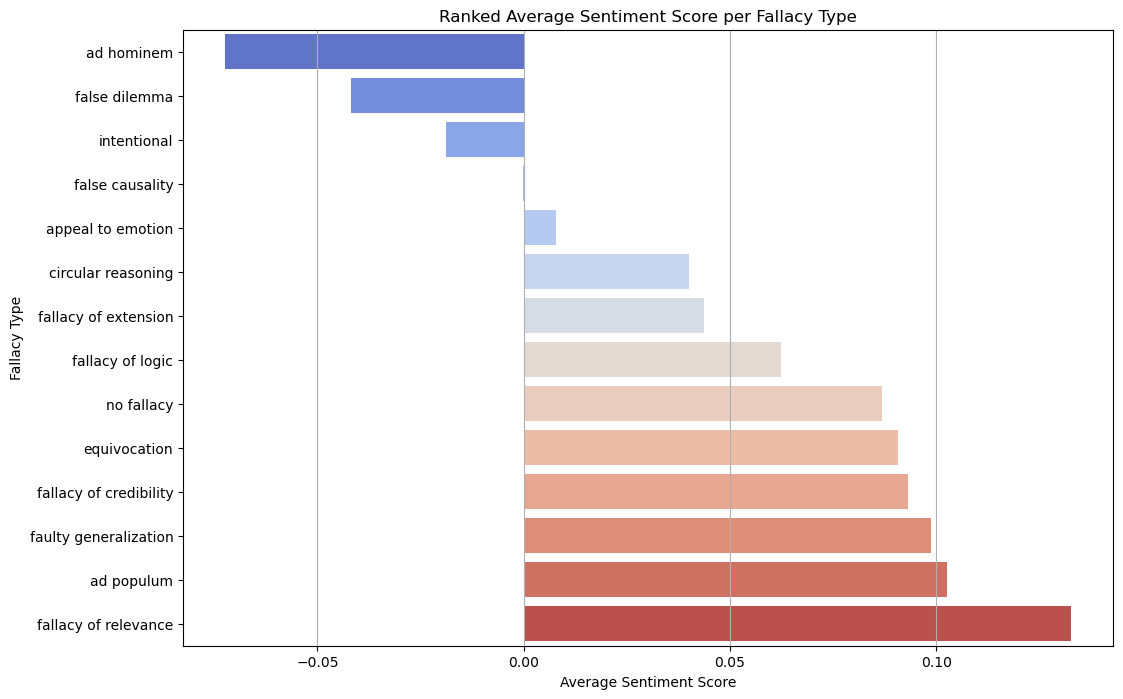

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate sentiment
def calculate_sentiment(text):
    if pd.isna(text):
        return 0
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the open responses
combined_df['sentiment'] = combined_df['open_response'].apply(calculate_sentiment)

# Calculate the average sentiment per fallacy type
sentiment_per_fallacy = combined_df.groupby('fallacy_type')['sentiment'].mean().reset_index()
sentiment_per_fallacy.columns = ['Fallacy_Type', 'Average_Sentiment']

# Sort the results from most negative to most positive
sentiment_per_fallacy = sentiment_per_fallacy.sort_values(by='Average_Sentiment', ascending=True)

# Display the results
print("Average Sentiment per Fallacy Type:")
print(sentiment_per_fallacy)

# Optionally, save the results to a CSV file
#sentiment_per_fallacy.to_csv('Sentiment_per_Fallacy_Type.csv', index=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Sentiment', y='Fallacy_Type', data=sentiment_per_fallacy, palette='coolwarm')
plt.title('Ranked Average Sentiment Score per Fallacy Type')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Fallacy Type')
plt.grid(axis='x')

# Show the plot
plt.show()
